In [1]:
# Import das bibliotecas necessarias:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from cmcrameri import cm # Necessary to use ROMA color map - You migth want to comment this line and use other color map
import sys # Necessary to read the path of python codes' folder
import utm # If necessary to convert geographic to projected coordinates
mypath = sys.path.append('/home/romulo/my_project_dir/Inversao_magnetica/codes/modules/Real_Arraial/')
import auxiliars, filtering
from grids import my_regular, my_profile
from scipy.interpolate import griddata

In [2]:
# Load data
x, y, mag = np.loadtxt('arraial_mag.dat', unpack = True)

In [3]:
# Setting colorbar ranges
cormin = mag.min()
cormax = mag.max()
corintervalo = np.round((cormax - cormin)/7)

In [4]:
# Setting area for Morro do Forno (northern anomaly)
area1 = (-42.03, -41.98, -22.97, -22.93)

# Shape of new data and grid creation
shp1 = (51,11)
xi1, yi1, zi1 = my_regular(area1, shp1, -100.) # The *-200* value represent the flight level
print(xi1.shape)
print(type(xi1))
#di1 = griddata((x,y), mag, (xi1,yi1), method = 'linear', fill_value=0.0)

(561,)
<class 'numpy.ndarray'>


In [5]:
# Setting x and y axis for plotting
xx = np.around(np.linspace(xi1.min(), xi1.max(), 6), decimals = 2)
yy = np.around(np.linspace(yi1.min(), yi1.max(), 5), decimals = 2)

In [6]:
xi1r = xi1.reshape(shp1)
yi1r = yi1.reshape(shp1)
di1r = griddata((x,y), mag, (xi1r,yi1r), method = 'linear', fill_value=0.0)

In [7]:
di1 = di1r.reshape(561,)

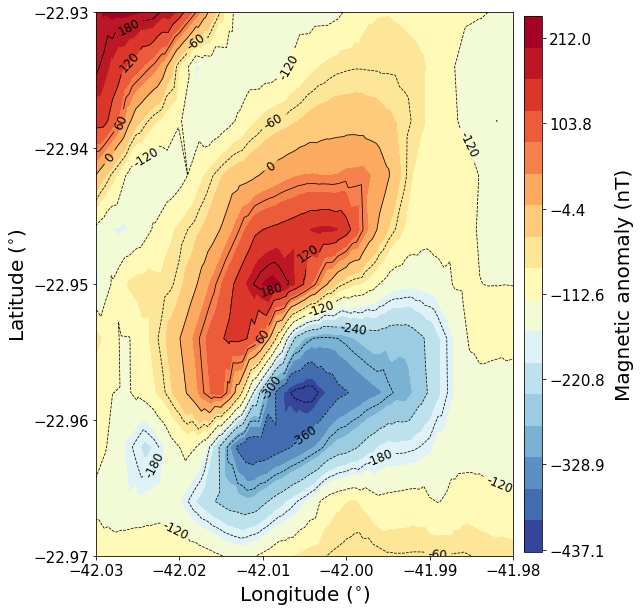

In [8]:
# Plotting data
plt.figure(figsize=(8,10))
cc = plt.tricontour(xi1, yi1, di1, 10, colors = 'k', linewidths = 0.75)
cl = plt.clabel(cc, inline = 1, fontsize = 12, fmt = '%1.0f')
cs = plt.tricontourf(xi1, yi1, di1, 20, cmap = plt.cm.RdYlBu_r, vmin = di1.min(), vmax = di1.max())
cb = plt.colorbar(cs, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(np.linspace(di1.min(), di1.max(), 7))
cb.set_label('Magnetic anomaly (nT)', fontsize = 20, labelpad = 10)
cb.ax.tick_params(labelsize = 15)
plt.xlabel('Longitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
plt.ylabel('Latitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
plt.xticks(xx, fontsize = 15)
plt.yticks(yy, fontsize = 15)
plt.show()

In [18]:
# Verify if x and y are 1D or 2D numpy arrays
if xi1r.shape[0] == xi1r.size or xi1r.shape[1] == xi1r.size:
    print('aa')
    dx = xi1r[1] - xi1r[0]
    nx = xi1r.size
else:
    print('bb')
    dx = (xi1r.max() - xi1r.min())/(xi1r.shape[1] - 1)
    nx = xi1r.shape[1]
    
if yi1r.shape[0] == yi1r.size or yi1r.shape[1] == yi1r.size:
    print('cc')
    dy = ygrid[1] - ygrid[0]
    ny = ygrid.size
else:
    print('dd')
    dy = (yi1r.max() - yi1r.min())/(yi1r.shape[0] - 1)
    ny = yi1r.shape[0]

print(dx,nx)
print(dy,ny)
print(xi1r.max(), xi1r.min())

bb
dd
0.005000000000000426 11
0.0007999999999999829 51
-41.98 -42.03


In [10]:
c = 2.*np.pi
kx = c*np.fft.fftfreq(nx, dx)
ky = c*np.fft.fftfreq(ny, dy)    

In [11]:
print(kx)

[   0.          114.23973286  228.47946572  342.71919857  456.95893143
  571.19866429 -571.19866429 -456.95893143 -342.71919857 -228.47946572
 -114.23973286]


In [12]:
print(ky)

[    0.           153.99963988   307.99927976   461.99891965
   615.99855953   769.99819941   923.99783929  1077.99747917
  1231.99711905  1385.99675894  1539.99639882  1693.9960387
  1847.99567858  2001.99531846  2155.99495835  2309.99459823
  2463.99423811  2617.99387799  2771.99351787  2925.99315776
  3079.99279764  3233.99243752  3387.9920774   3541.99171728
  3695.99135716  3849.99099705 -3849.99099705 -3695.99135716
 -3541.99171728 -3387.9920774  -3233.99243752 -3079.99279764
 -2925.99315776 -2771.99351787 -2617.99387799 -2463.99423811
 -2309.99459823 -2155.99495835 -2001.99531846 -1847.99567858
 -1693.9960387  -1539.99639882 -1385.99675894 -1231.99711905
 -1077.99747917  -923.99783929  -769.99819941  -615.99855953
  -461.99891965  -307.99927976  -153.99963988]


In [13]:
resultx, resulty = np.meshgrid(kx,ky)

In [14]:
print(type(resultx))
print(resultx.shape)

<class 'numpy.ndarray'>
(51, 11)


In [15]:
print(resultx)

[[   0.          114.23973286  228.47946572  342.71919857  456.95893143
   571.19866429 -571.19866429 -456.95893143 -342.71919857 -228.47946572
  -114.23973286]
 [   0.          114.23973286  228.47946572  342.71919857  456.95893143
   571.19866429 -571.19866429 -456.95893143 -342.71919857 -228.47946572
  -114.23973286]
 [   0.          114.23973286  228.47946572  342.71919857  456.95893143
   571.19866429 -571.19866429 -456.95893143 -342.71919857 -228.47946572
  -114.23973286]
 [   0.          114.23973286  228.47946572  342.71919857  456.95893143
   571.19866429 -571.19866429 -456.95893143 -342.71919857 -228.47946572
  -114.23973286]
 [   0.          114.23973286  228.47946572  342.71919857  456.95893143
   571.19866429 -571.19866429 -456.95893143 -342.71919857 -228.47946572
  -114.23973286]
 [   0.          114.23973286  228.47946572  342.71919857  456.95893143
   571.19866429 -571.19866429 -456.95893143 -342.71919857 -228.47946572
  -114.23973286]
 [   0.          114.23973286  228

In [16]:
kcont = np.exp((-200.0) * np.sqrt(resultx**2 + resulty**2))

In [17]:
kcont

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.